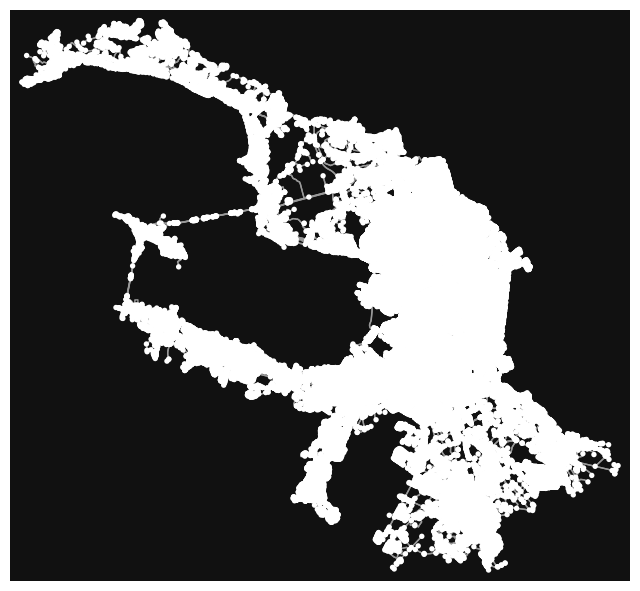

In [2]:
# Граф с дорогами и перекрестками
import osmnx as ox
import matplotlib.pyplot as plt

graph = ox.graph_from_place('Saint Petersburg, Russia', network_type='all') # граф всех дорог и перекрестков

# ox.save_graph_geopackage(graph_roads, filepath='/path/roads.gpkg') надо подумать как сохранить чтобы отобразить в qgis

ox.plot_graph(graph)
plt.show()

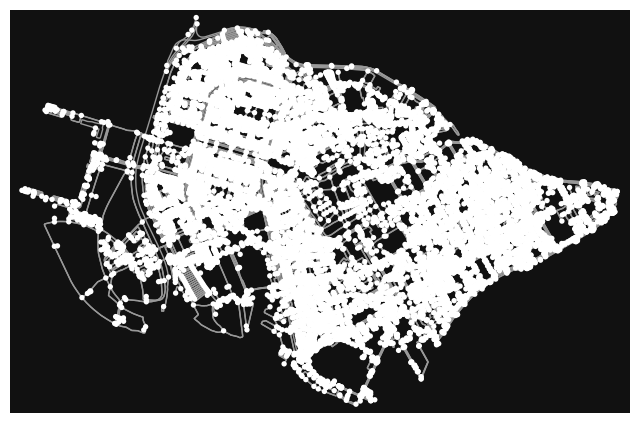

In [2]:
# Ниже недобольшая область того как это выглядит
# Граф с дорогами и перекрестками
graph = ox.graph_from_place('Vasileostrovsky District, Saint Petersburg, Russia', network_type='all')

ox.plot_graph(graph)
plt.show()

/tmp/ipykernel_12253/3100230930.py:7: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = ox.geometries_from_place('Vasileostrovsky District, Saint Petersburg, Russia', tags={'building':True}) # формируем запрос для всех зданий
/tmp/ipykernel_12253/3100230930.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  building_centroids = buildings.centroid # вычисляем центры масс зданий


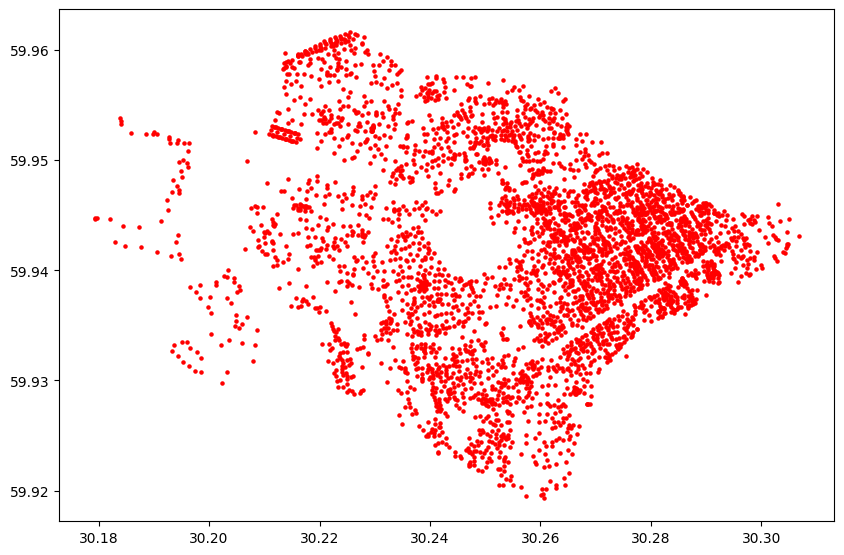

In [3]:
# Ниже недобольшая область того как это выглядит
# Граф с центрами масс зданий
import geopandas as gpd

buildings = ox.geometries_from_place('Vasileostrovsky District, Saint Petersburg, Russia', tags={'building':True}) # формируем запрос для всех зданий

building_centroids = buildings.centroid # вычисляем центры масс зданий

gdf = gpd.GeoDataFrame(building_centroids, columns=['geometry'], crs=buildings.crs) # GeoDataFrame с центрами масс зданий

fig, ax = plt.subplots(figsize=(10,10))
# buildings.plot(ax=ax, facecolor='blue')
gdf.plot(ax=ax, color='red', markersize=5)

plt.show()

Нужно подумать как мы можем объединить эти графы, если искомый граф - это кратчайшее расстояние от центров зданий до графа дорог 

In [2]:
# Граф с центрами масс зданий
# Видимо из-за большого кол-ва данных все ломается
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

buildings = ox.geometries_from_place('Saint Petersburg, Russia', tags={'building':True}) # формируем запрос для всех зданий

building_centroids = buildings.centroid # вычисляем центры масс зданий

gdf = gpd.GeoDataFrame(building_centroids, columns=['geometry'], crs=buildings.crs) # GeoDataFrame с центрами масс зданий

# gdf.to_file('/path/buildings.gpkg', driver="GPKG") надо подумать как сохранить чтобы отобразить в qgis

fig, ax = plt.subplots(figsize=(10,10))
# buildings.plot(ax=ax, facecolor='blue')
gdf.plot(ax=ax, color='red', markersize=5)

plt.show()

/tmp/ipykernel_11936/1040557291.py:6: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = ox.geometries_from_place('Saint Petersburg, Russia', tags={'building':True}) # формируем запрос для всех зданий


: 